In [2]:
import os
os.chdir("../..")  # Change to project root directory
from packages.models.variational_autoencoder import ConvVAE3D 
from packages.train.training import train_model
from packages.train.loss import VaeLoss
from packages.io.input_loader import get_data_loaders
import torch
import os
from packages.data_objects.dataset import Dataset, CustomTestDataset

model = ConvVAE3D(in_channels=25, latent_dim=64, hidden_dims=[32, 64, 128])

dataset_path = "/media/lolly/Bruh/WAYEEGGAL_dataset/WAYEEG_autoencoder_subset"
# Dummy training loop
optimizer = torch.optim.AdamW
criterion = VaeLoss(beta=4)
mae = torch.nn.L1Loss

config = {
    'batch_size': 32,
    'lr': 1e-4,
    'weight_decay': 1e-4,
    'epochs': 100,
    'EarlyStopping' : {'patience': 15, 'min_delta': 0.1},
    'BackupManager': {'backup_interval': 10, 'backup_path': './model_backups'},
    'ReduceLROnPlateau': {'mode': 'min', 'patience': 8, 'factor': 0.1},
    'history_plot': {'plot_type': 'extended', 'save_path': './training_history'}
}

dataset = CustomTestDataset(root_folder=dataset_path, unpack_func='dict', file_type='npz', nsamples=64)

train_loader, val_loader, _ = get_data_loaders(dataset, sets_size={'train': 0.7, 'val': 0.3, 'test': 0})

print("\nStarting training loop...")
model.train()
model = train_model(model, train_loader=train_loader, val_loader=val_loader, loss_criterion=criterion, optimizer=optimizer, config=config, metrics={})


Starting training loop...


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

[INFO] Train Loss: 158.5256


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]


[INFO] Val Loss: 1.6766
[INFO] Best model saved at epoch 1 with metric 1.6766


Epochs:   1%|          | 1/100 [00:01<02:51,  1.73s/it]

[INFO] Train Loss: 81.3354


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]


[INFO] Val Loss: 2.4083


Epochs:   2%|▏         | 2/100 [00:03<02:39,  1.63s/it]

[INFO] Train Loss: 120.0478


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


[INFO] Val Loss: 2.2242


Epochs:   3%|▎         | 3/100 [00:04<02:33,  1.58s/it]

[INFO] Train Loss: 37.9789


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


[INFO] Val Loss: 2.7908


Epochs:   4%|▍         | 4/100 [00:06<02:33,  1.60s/it]

[INFO] Train Loss: 55.5521


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


[INFO] Val Loss: 3.1874


Epochs:   5%|▌         | 5/100 [00:08<02:35,  1.64s/it]

[INFO] Train Loss: 38.1204


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]


[INFO] Val Loss: 3.3177


Epochs:   6%|▌         | 6/100 [00:09<02:29,  1.59s/it]

[INFO] Train Loss: 32.0791


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]


[INFO] Val Loss: 4.6016


Epochs:   7%|▋         | 7/100 [00:11<02:28,  1.60s/it]

[INFO] Train Loss: 28.4104


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


[INFO] Val Loss: 4.4673


Epochs:   8%|▊         | 8/100 [00:12<02:28,  1.62s/it]

[INFO] Train Loss: 14.5436


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]


[INFO] Val Loss: 5.8618


Epochs:   9%|▉         | 9/100 [00:14<02:27,  1.62s/it]

[INFO] Train Loss: 19.5279


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]


[INFO] Val Loss: 7.0512
[INFO] Periodic backup saved at epoch 10
[INFO] Updated Learning Rate: 0.000010


Epochs:  10%|█         | 10/100 [00:16<02:26,  1.63s/it]

[INFO] Train Loss: 16.1175


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]


[INFO] Val Loss: 8.1838


Epochs:  11%|█         | 11/100 [00:17<02:27,  1.66s/it]

[INFO] Train Loss: 12.9295


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]


[INFO] Val Loss: 8.8176


Epochs:  12%|█▏        | 12/100 [00:19<02:24,  1.65s/it]

[INFO] Train Loss: 8.6271


Training Batches: 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]


[INFO] Val Loss: 9.2192


Epochs:  13%|█▎        | 13/100 [00:21<02:22,  1.64s/it]

[INFO] Train Loss: 5.0423


Epochs:  13%|█▎        | 13/100 [00:22<02:32,  1.75s/it]


KeyboardInterrupt: 

/home/lolly/Projects/MIEEG/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


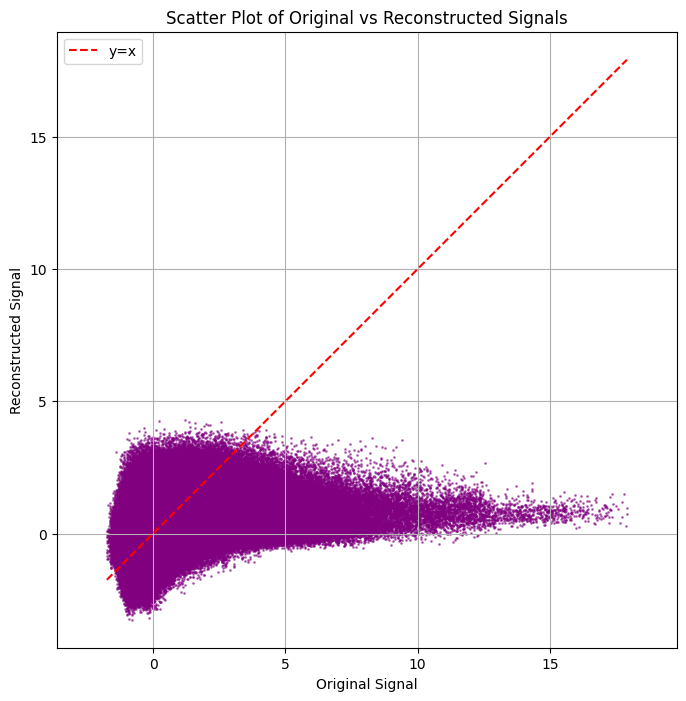

In [3]:
from packages.plotting.reconstruction_plots import plot_reconstruction_scatter
sample = next(iter(val_loader))
inputs = sample.to(torch.device('cpu'))
model.eval()
with torch.no_grad():
    reconstructed = model(inputs)
# Plotting the scatter plot
plot_reconstruction_scatter(original=inputs, reconstructed=reconstructed)